In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings 
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
df = pd.read_csv('synthetic_mission_outcome_data.csv')
df.head()

,Unit_Type,Operation_Type,Base_Location,Morale_Score,Supply_Level,Communication_Quality,Command_Structure,Intel_Availability,Equipment_Readiness,Training_Level,Casualty_Count,Engagement_Frequency,Resilience_Index,Success_Rate,Mission_Outcome
0,Infantry,Reconnaissance,Mountainous,8.361531,Medium,6.894029,Hierarchical,Limited,Fair,Advanced,15,Occasionally,6.182286,79.382725,Ongoing
1,Naval,Support,Coastal,4.995508,Low,8.074431,Decentralized,Extensive,Excellent,Basic,1,Rarely,4.195634,63.683247,Ongoing
2,Armored,Reconnaissance,Coastal,3.363996,Medium,5.961709,Hierarchical,Extensive,Fair,Intermediate,15,Occasionally,4.539636,61.760341,Ongoing
3,Infantry,Support,Rural,5.246037,Low,9.639878,Hierarchical,Minimal,Fair,Basic,34,Occasionally,4.972443,68.865808,Ongoing
4,Infantry,Support,Urban,3.898932,Medium,6.095776,Decentralized,Limited,Good,Advanced,27,Rarely,7.152742,57.666148,Ongoing


In [3]:
df.select_dtypes(include='object').columns

Index(['Unit_Type', 'Operation_Type', 'Base_Location', 'Supply_Level',
       'Command_Structure', 'Intel_Availability', 'Equipment_Readiness',
       'Training_Level', 'Engagement_Frequency', 'Mission_Outcome'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unit_Type              10000 non-null  object 
 1   Operation_Type         10000 non-null  object 
 2   Base_Location          10000 non-null  object 
 3   Morale_Score           10000 non-null  float64
 4   Supply_Level           10000 non-null  object 
 5   Communication_Quality  10000 non-null  float64
 6   Command_Structure      10000 non-null  object 
 7   Intel_Availability     10000 non-null  object 
 8   Equipment_Readiness    10000 non-null  object 
 9   Training_Level         10000 non-null  object 
 10  Casualty_Count         10000 non-null  int64  
 11  Engagement_Frequency   10000 non-null  object 
 12  Resilience_Index       10000 non-null  float64
 13  Success_Rate           10000 non-null  float64
 14  Mission_Outcome        10000 non-null  object 
dtypes: 

In [5]:
df.shape

(10000, 15)

In [6]:
df.isnull().sum()

Unit_Type                0
Operation_Type           0
Base_Location            0
Morale_Score             0
Supply_Level             0
Communication_Quality    0
Command_Structure        0
Intel_Availability       0
Equipment_Readiness      0
Training_Level           0
Casualty_Count           0
Engagement_Frequency     0
Resilience_Index         0
Success_Rate             0
Mission_Outcome          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Unit_Type                0
Operation_Type           0
Base_Location            0
Morale_Score             0
Supply_Level             0
Communication_Quality    0
Command_Structure        0
Intel_Availability       0
Equipment_Readiness      0
Training_Level           0
Casualty_Count           0
Engagement_Frequency     0
Resilience_Index         0
Success_Rate             0
Mission_Outcome          0
dtype: int64

In [9]:
df.describe()

,Morale_Score,Communication_Quality,Casualty_Count,Resilience_Index,Success_Rate
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5.030406,6.989781,24.61870,4.996503,70.053177
std,2.008421,2.013990,14.41931,1.500930,15.242077
min,-2.712751,-0.562053,0.00000,-0.580642,14.180082
25%,3.671697,5.646837,12.00000,3.971910,59.583111
50%,5.035825,6.987723,25.00000,5.005214,70.114075
75%,6.396854,8.330202,37.00000,6.001071,80.307443
max,13.958169,14.148602,49.00000,10.593250,122.474254


In [10]:
df.kurtosis

<bound method DataFrame.kurt of      Unit_Type  Operation_Type Base_Location  Morale_Score Supply_Level  \
0     Infantry  Reconnaissance   Mountainous      8.361531       Medium   
1        Naval         Support       Coastal      4.995508          Low   
2      Armored  Reconnaissance       Coastal      3.363996       Medium   
3     Infantry         Support         Rural      5.246037          Low   
4     Infantry         Support         Urban      3.898932       Medium   
...        ...             ...           ...           ...          ...   
9995     Naval          Combat         Rural      3.153169          Low   
9996  Infantry          Combat         Rural      4.044800         High   
9997  Aviation          Combat         Rural      5.096384         High   
9998  Aviation         Support       Coastal      7.598862          Low   
9999   Armored  Reconnaissance   Mountainous      7.822210       Medium   

      Communication_Quality Command_Structure Intel_Availability  \

In [11]:
num = df.select_dtypes(include= ['int64', 'float64'])
a = num.skew
print(a)

<bound method DataFrame.skew of       Morale_Score  Communication_Quality  Casualty_Count  Resilience_Index  \
0         8.361531               6.894029              15          6.182286   
1         4.995508               8.074431               1          4.195634   
2         3.363996               5.961709              15          4.539636   
3         5.246037               9.639878              34          4.972443   
4         3.898932               6.095776              27          7.152742   
...            ...                    ...             ...               ...   
9995      3.153169               5.846086              40          3.725112   
9996      4.044800               6.027876              21          2.697217   
9997      5.096384               7.133976              48          5.675725   
9998      7.598862               7.681344              16          3.923940   
9999      7.822210               8.472907              16          5.714592   

      Success_Rate 

Outliers Detection

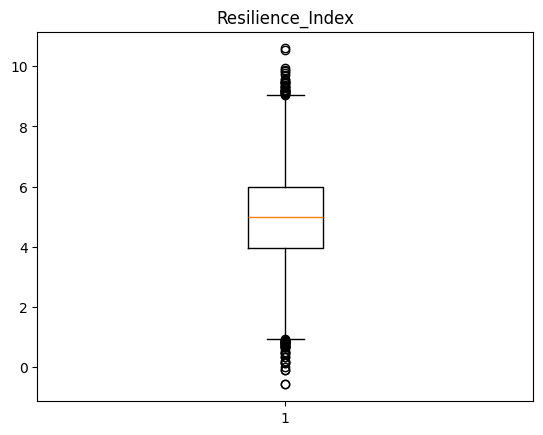

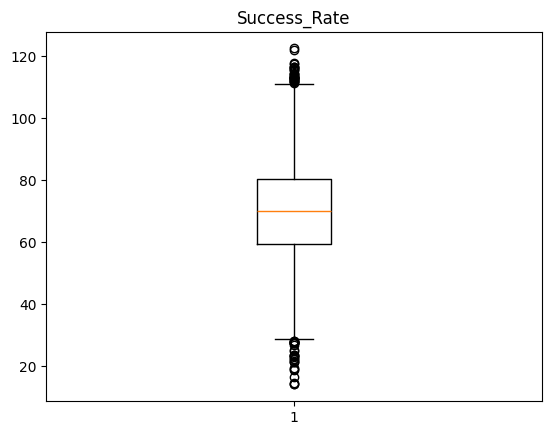

In [12]:
for column in df[['Resilience_Index', 'Success_Rate']]:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

Outliers Handling

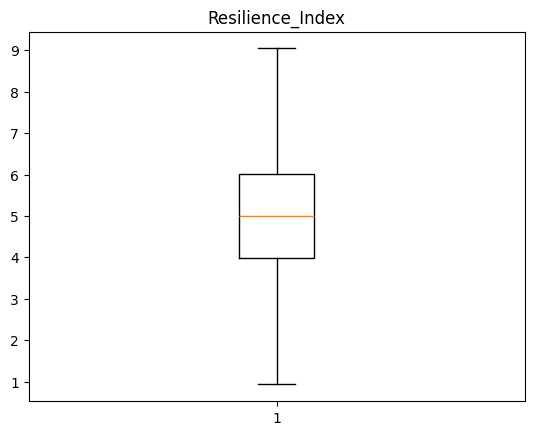

In [13]:
q1 = df['Resilience_Index'].quantile(0.25)
q3 = df['Resilience_Index'].quantile(0.75)
iqr = q3 -q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

df['Resilience_Index'] = np.where(df['Resilience_Index']>upper_limit, upper_limit, np.where(df['Resilience_Index']<lower_limit, lower_limit, df['Resilience_Index']))

plt.boxplot(df['Resilience_Index'])
plt.title('Resilience_Index')
plt.show()

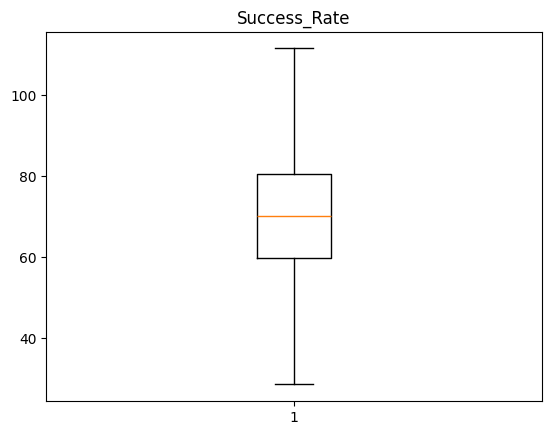

In [14]:
q1 = df['Success_Rate'].quantile(0.25)
q3 = df['Success_Rate'].quantile(0.75)
iqr = q3 -q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

df['Success_Rate'] = np.where(df['Success_Rate']>upper_limit, upper_limit, np.where(df['Success_Rate']<lower_limit, lower_limit, df['Success_Rate']))

plt.boxplot(df['Success_Rate'])
plt.title('Success_Rate')
plt.show()

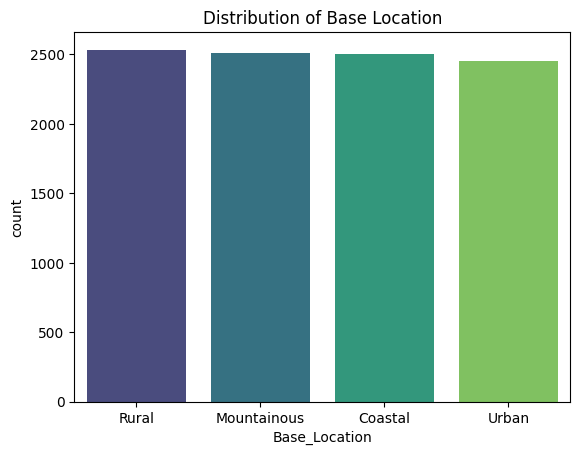

In [15]:
sns.barplot(df['Base_Location'].value_counts(), palette= 'viridis')
plt.title('Distribution of Base Location')
plt.show()

Interpretation: The bar chart displays the distribution of base locations. Coastal locations have the highest count, followed closely by mountainous and rural areas. Urban locations have a significantly lower count, and the number of unknown locations is minimal.

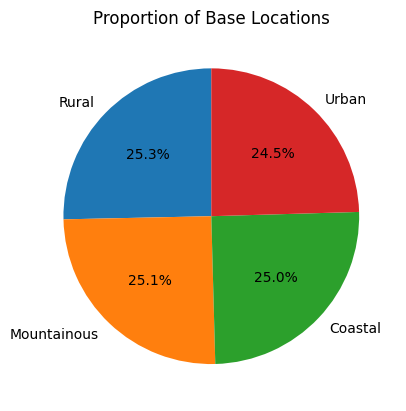

In [16]:
df['Base_Location'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Base Locations')
plt.ylabel('')
plt.show()


The pie chart illustrates the proportion of base locations in four categories: Rural, Urban, Mountainous, and Coastal. Each segment of the pie represents a category, with its size indicating the percentage of base locations in that category.Based on the chart, the distribution of base locations is relatively balanced, with each category accounting for approximately 25% of the total. This suggests that the bases are spread across various geographic regions, ensuring a diverse representation and potentially mitigating risks associated with concentration in a single area.

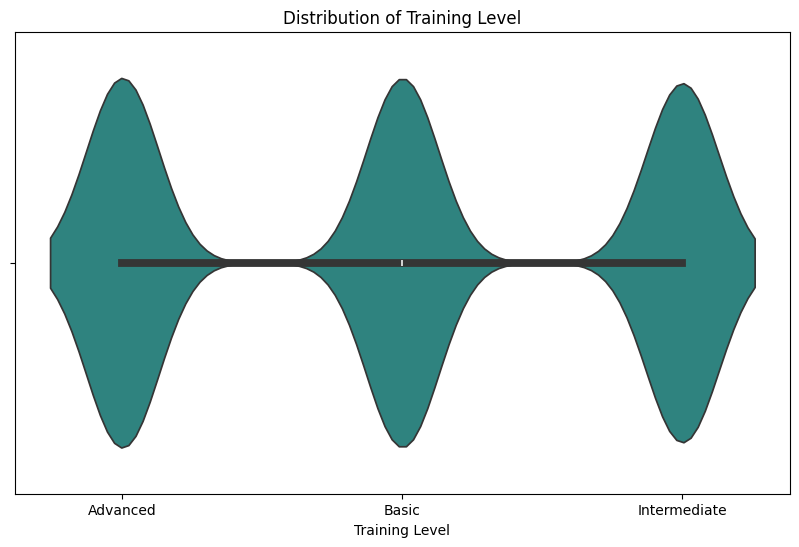

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Training_Level'], palette= 'viridis')
plt.title('Distribution of Training Level')
plt.xlabel('Training Level')
plt.show()


Interpretation: The violin plot illustrates the distribution of training levels across intermediate, basic, and advanced categories. While the basic level exhibits a wider range of values and a more symmetrical distribution, intermediate and advanced levels show a denser concentration of data points with longer tails, suggesting greater variability in those groups. 

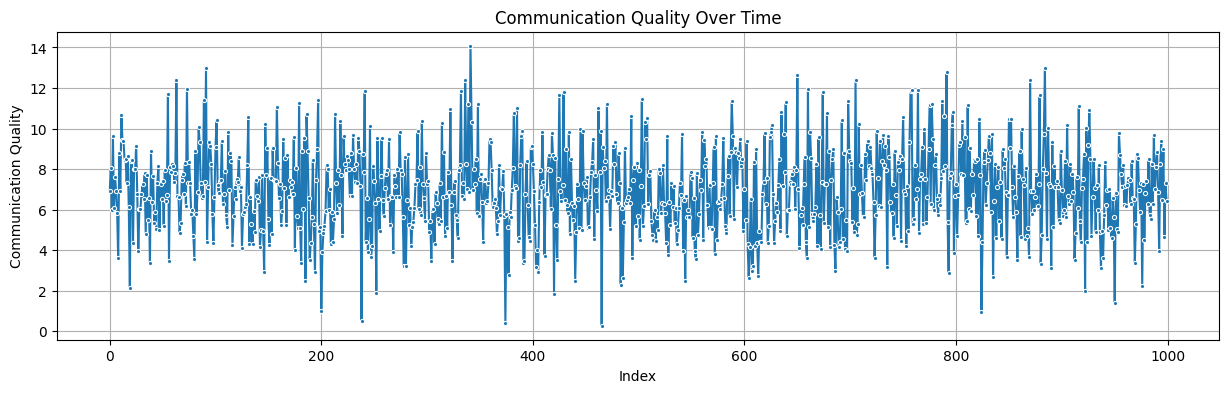

In [18]:
plt.figure(figsize=(15, 4))
sns.lineplot(df['Communication_Quality'].head(1000), marker='.', palette= 'viridis')
plt.title('Communication Quality Over Time')
plt.xlabel('Index')
plt.ylabel('Communication Quality')
plt.grid(True)
plt.show()


Interpretation: The line chart illustrates significant fluctuations in communication quality over time. Despite a potential scale ranging from 0 to 1000, the actual values remain consistently low, fluctuating between 0 and 10. This indicates a high degree of variability in communication quality with no discernible pattern. The data lacks a clear trend or predictability, suggesting inconsistent communication performance throughout the observed period. 

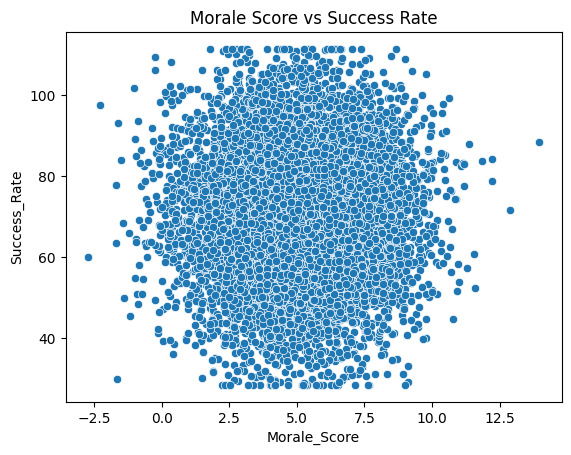

In [19]:
sns.scatterplot(x='Morale_Score', y='Success_Rate', data=df)
plt.title('Morale Score vs Success Rate')
plt.show()

The analysis of the scatter plot revealed a complex relationship between morale and success. While there was no strong linear correlation, clustering and outliers suggested that factors beyond morale may influence success rates. The findings challenge the assumption that high morale is a guaranteed predictor of success, emphasizing the importance of considering other factors such as team dynamics, resources, and external circumstances. Further research is needed to gain a deeper understanding of the interplay between these variables and their implications for organizational performance.


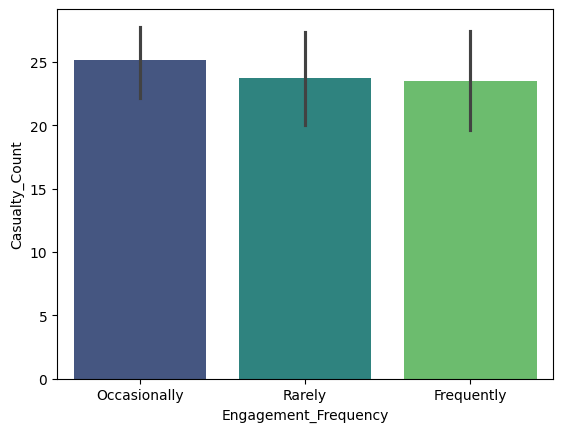

In [20]:
sns.barplot(data = df.head(200), x = 'Engagement_Frequency', y = 'Casualty_Count', palette= 'viridis')
plt.show()

Interpretation: The graph illustrates a positive correlation between engagement frequency and casualty count. Higher engagement frequency is associated with a greater average number of casualties. However, the variability in casualty count is higher for less frequent engagements.

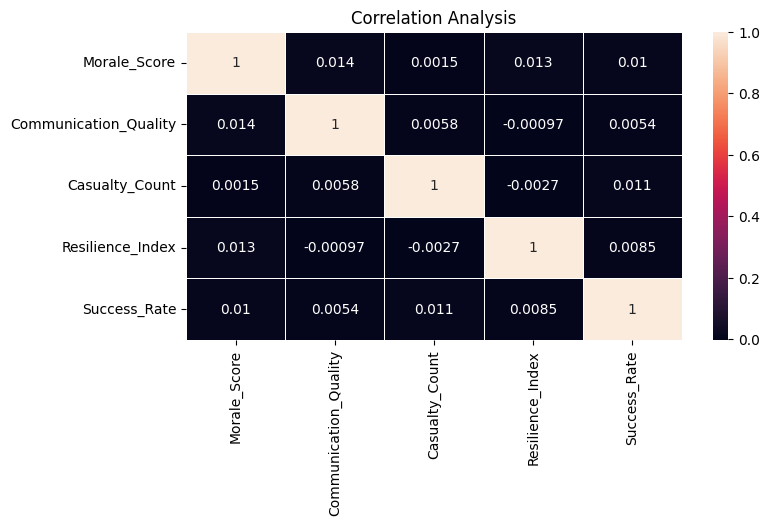

In [21]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[['Morale_Score', 'Communication_Quality', 'Casualty_Count',
       'Resilience_Index', 'Success_Rate']].corr(), annot=True, cmap='rocket', linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()


Interpretation: The correlation matrix reveals negligible relationships between variables. Morale Score, Communication Quality, Casualty Count, Resilience Index, and Success Rate exhibit minimal correlation with each other, suggesting independent influences on the overall outcome.

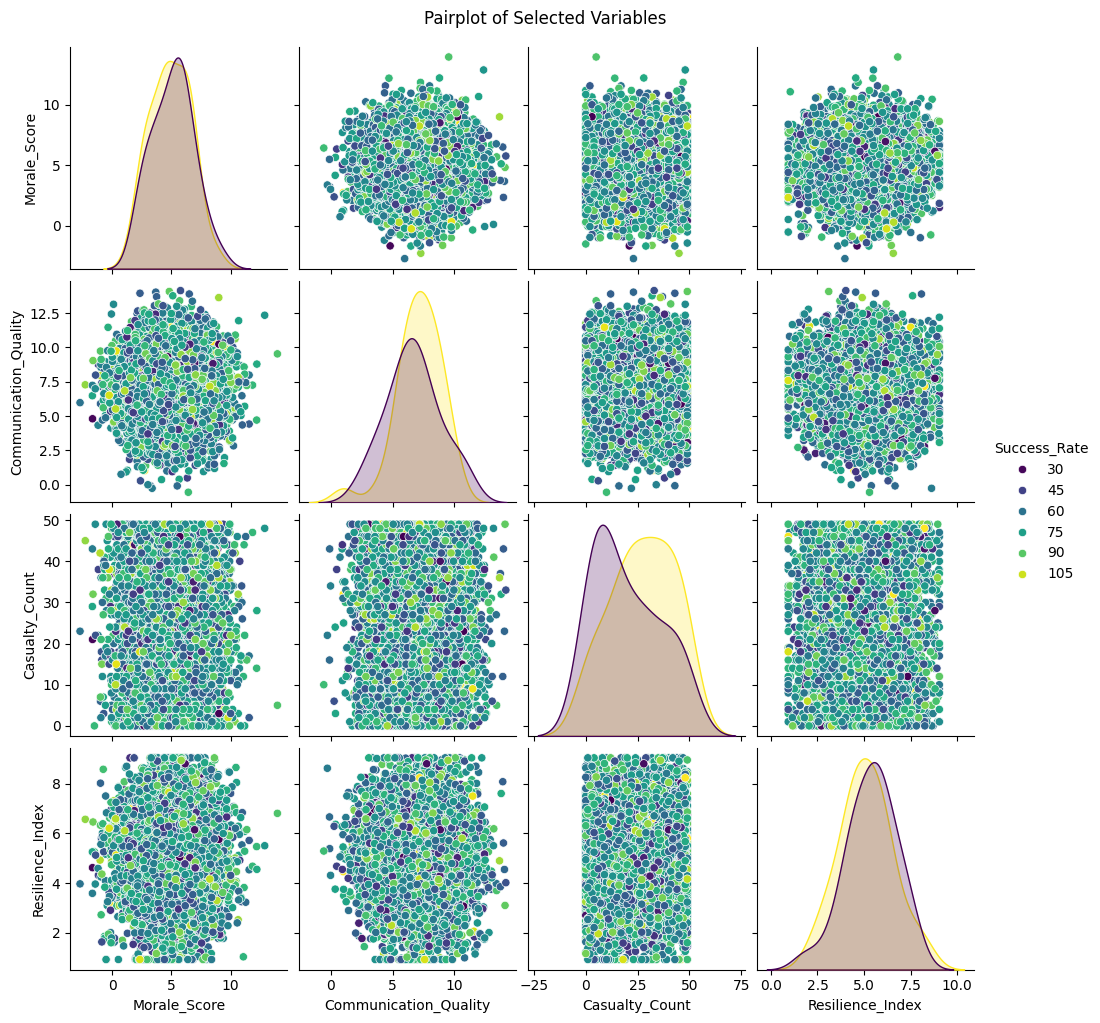

In [22]:

# Create the pairplot with a color palette
pair_plot = sns.pairplot(df, palette='viridis', diag_kind='kde', hue='Success_Rate')

# Add a title to the plot
plt.suptitle('Pairplot of Selected Variables', y=1.02)

# Display the plot
plt.show()


The pairplot reveals that Morale_Score and Casualty_Count are skewed, while Communication_Quality and Resilience_Index are normally distributed. Scatter plots show correlations between variables, suggesting that higher morale might be linked to better communication and lower casualty counts, and that better communication might be associated with higher resilience. The color coding based on Success_Rate might also reveal patterns. Overall, the pairplot offers a comprehensive understanding of the relationships between the variables.


Categorical Data Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder=LabelEncoder()

In [25]:
df['Unit_Type'] = encoder.fit_transform(df['Unit_Type'])

In [26]:
df['Operation_Type'] = encoder.fit_transform(df['Operation_Type'])

In [27]:
df['Base_Location'] = encoder.fit_transform(df['Base_Location'])

In [28]:
df['Morale_Score'] = encoder.fit_transform(df['Morale_Score'])

In [29]:
df['Supply_Level'] = encoder.fit_transform(df['Supply_Level'])

In [30]:
df['Intel_Availability'] = encoder.fit_transform(df['Intel_Availability'])

In [31]:
df['Command_Structure'] = encoder.fit_transform(df['Command_Structure'])

In [32]:
df['Intel_Availability'] = encoder.fit_transform(df['Intel_Availability'])

In [33]:
df['Equipment_Readiness'] = encoder.fit_transform(df['Equipment_Readiness'])

In [34]:
df['Training_Level'] = encoder.fit_transform(df['Training_Level'])

In [35]:
df['Engagement_Frequency'] = encoder.fit_transform(df['Engagement_Frequency'])

In [36]:
df

,Unit_Type,Operation_Type,Base_Location,Morale_Score,Supply_Level,Communication_Quality,Command_Structure,Intel_Availability,Equipment_Readiness,Training_Level,Casualty_Count,Engagement_Frequency,Resilience_Index,Success_Rate,Mission_Outcome
0,2,1,1,9507,2,6.894029,2,1,1,0,15,1,6.182286,79.382725,Ongoing
1,3,2,0,4916,1,8.074431,0,0,0,1,1,2,4.195634,63.683247,Ongoing
2,0,1,0,2025,2,5.961709,2,0,1,2,15,1,4.539636,61.760341,Ongoing
3,2,2,2,5447,1,9.639878,2,2,1,1,34,1,4.972443,68.865808,Ongoing
4,2,2,3,2877,2,6.095776,0,1,2,0,27,2,7.152742,57.666148,Ongoing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,0,2,1720,1,5.846086,2,2,0,0,40,1,3.725112,64.146134,Ongoing
9996,2,0,2,3150,0,6.027876,0,1,0,2,21,2,2.697217,61.999582,Ongoing
9997,1,0,2,5149,0,7.133976,1,1,2,2,48,2,5.675725,78.731775,Ongoing
9998,1,2,0,8971,1,7.681344,1,1,2,0,16,1,3.923940,91.771752,Ongoing


Dropping less important features for better accuracy

In [37]:
df.drop(['Unit_Type','Operation_Type','Base_Location','Command_Structure','Equipment_Readiness'],axis=1,inplace=True)

Data Splitting for Training and Testing

In [38]:
x=df.drop("Mission_Outcome", axis=1)
y=df[['Mission_Outcome']]

In [39]:
x.columns

Index(['Morale_Score', 'Supply_Level', 'Communication_Quality',
       'Intel_Availability', 'Training_Level', 'Casualty_Count',
       'Engagement_Frequency', 'Resilience_Index', 'Success_Rate'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,stratify=y, random_state=42)

Model Building

Random Forest Classification

In [42]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_predict= rf.predict(x_test)
y_train_predict = rf.predict(x_train)

In [44]:
print('training accuracy',accuracy_score(y_train, y_train_predict))
print('testing accuracy',accuracy_score(y_test, y_predict))

training accuracy 1.0
testing accuracy 1.0


Logistic Regression Classification

In [45]:
lg = LogisticRegression(max_iter=1000)
lg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred = lg.predict(x_test)
y_train_pred = lg.predict(x_train)

In [47]:
print('training accuracy',accuracy_score(y_train, y_train_pred))
print('testing accuracy',accuracy_score(y_test, y_pred))

training accuracy 0.939625
testing accuracy 0.945


K-Nearest Neighbors Classification

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
y_pred1 = lg.predict(x_test)
y_train_pred1 = lg.predict(x_train)

In [50]:
print('training accuracy',accuracy_score(y_train, y_train_pred1))
print('testing accuracy',accuracy_score(y_test, y_pred1))

training accuracy 0.939625
testing accuracy 0.945


Decision Tree Classification

In [51]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


DecisionTreeClassifier()

In [52]:
y_pred2 = lg.predict(x_test)
y_train_pred2 = lg.predict(x_train)

In [53]:
print('training accuracy',accuracy_score(y_train, y_train_pred2))
print('testing accuracy',accuracy_score(y_test, y_pred2))

training accuracy 0.939625
testing accuracy 0.945


In [54]:
rf.predict([[9507	,2	,6.894029	,1	,0	,15	,1	,6.182286	,79.382725]])

array(['Ongoing'], dtype=object)

Classification Report

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Failed       0.00      0.00      0.00        31
     Ongoing       0.95      0.99      0.97      1861
  Successful       0.74      0.47      0.58       108

    accuracy                           0.94      2000
   macro avg       0.56      0.49      0.52      2000
weighted avg       0.93      0.94      0.93      2000



Model Deployed into Pickle file 

In [56]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [57]:
with open("model.pkl", 'rb') as f:
    model = pickle.load(f)

model.predict(x_test)

array(['Successful', 'Ongoing', 'Ongoing', ..., 'Successful', 'Ongoing',
       'Ongoing'], dtype=object)